In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('Practice.csv',na_values={
'TotalCharges':[" ","n.a"]})
pd.set_option('display.max_columns', None)
data.head(20)

,customerID,Region,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,France,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,France,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,France,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,France,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,France,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,France,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,France,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,France,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,France,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,France,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
customerID          7043 non-null object
Region              7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-nul

In [3]:
data.shape

(7043, 22)

In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [5]:
data.isnull().sum()

customerID           0
Region               0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

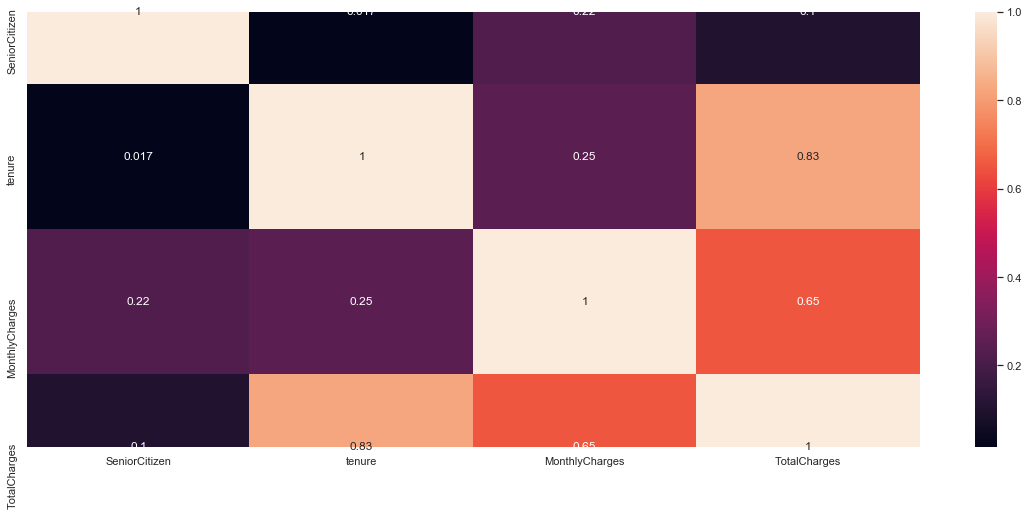

In [6]:
sns.set(rc={'figure.figsize':(20,8)});
sns.heatmap(data.corr(), annot=True)
plt.show()

In [7]:
def distribusi(kolom,data):
    skewness = data.loc[:,kolom].skew()
    print("Kolom {} mempunyai skewness {}.".format(kolom,skewness))
    sns.set(style="ticks")
    f, (ax_box,ax_hist) = plt.subplots(2,sharex=True, figsize=(15,6),
                                      gridspec_kw={"height_ratios":(.15,.85)})
    sns.boxplot(data.loc[~data.loc[:,kolom].isna(),kolom], ax=ax_box, color='r').set_xlabel('')
    sns.distplot(data.loc[~data.loc[:,kolom].isna(),kolom], ax=ax_hist, color='b')
    
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True);

Kolom MonthlyCharges mempunyai skewness -0.22052443394398033.


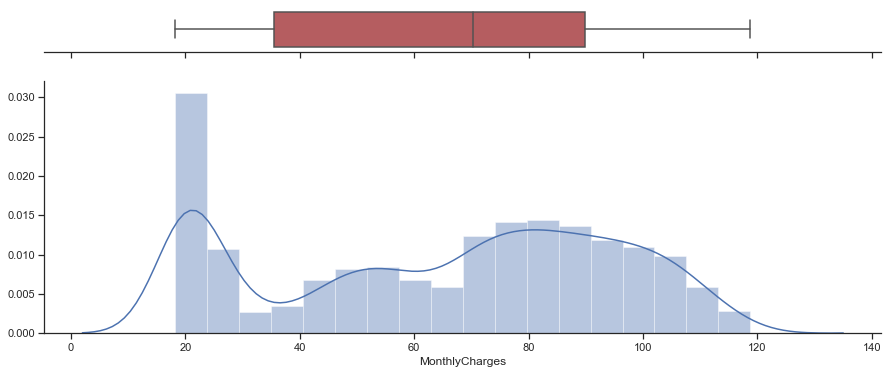

In [8]:
distribusi('MonthlyCharges',data)

Kolom TotalCharges mempunyai skewness 0.961642499724251.


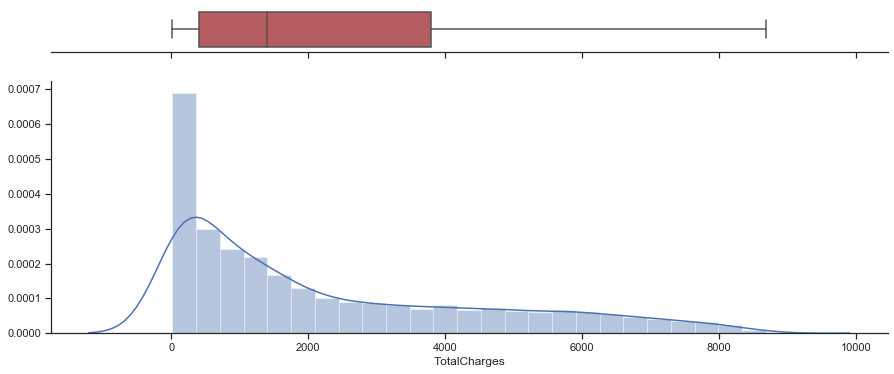

In [9]:
distribusi('TotalCharges',data)

In [10]:
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].median())

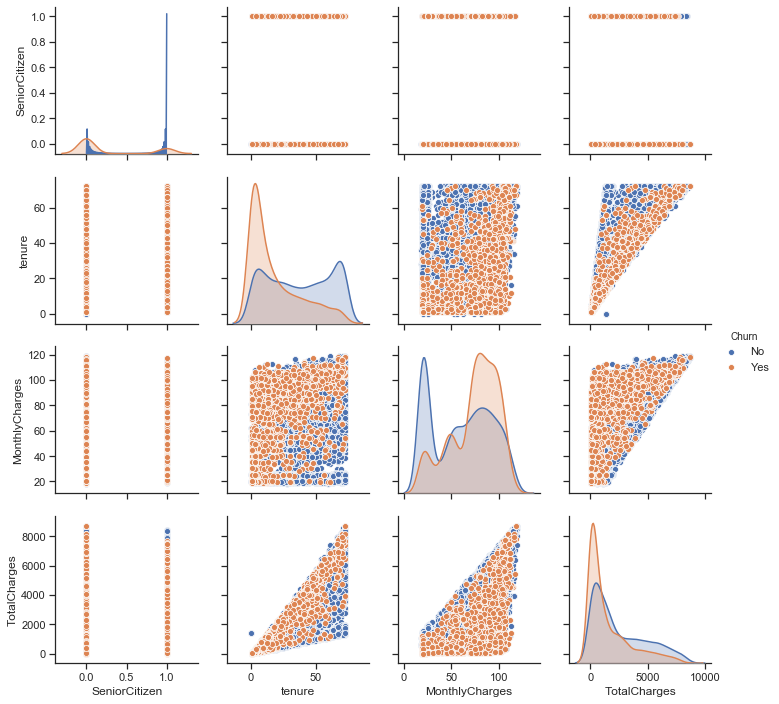

In [11]:
sns.pairplot(data, hue="Churn")

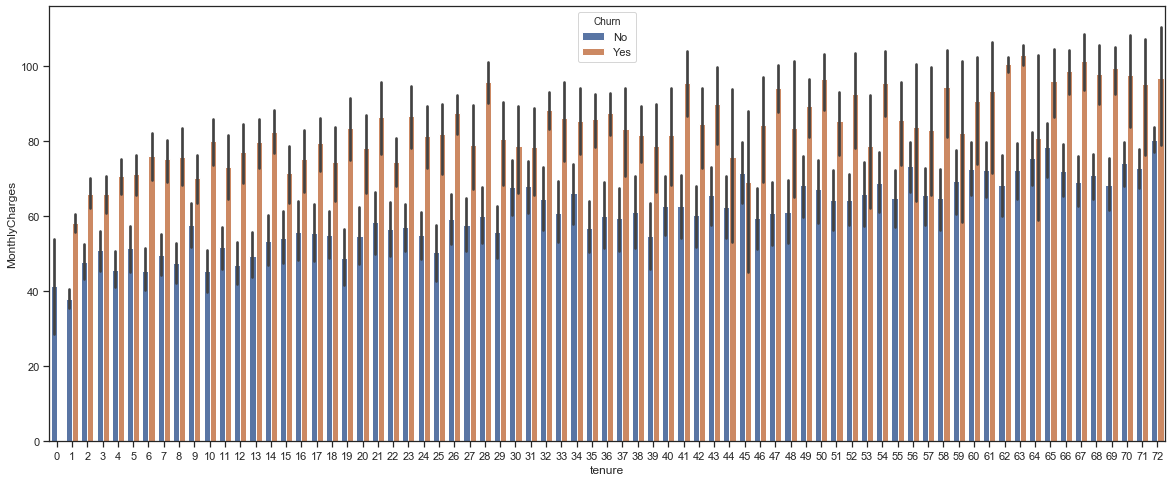

In [12]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x='tenure', y ='MonthlyCharges', hue='Churn', data = data, )
plt.show()

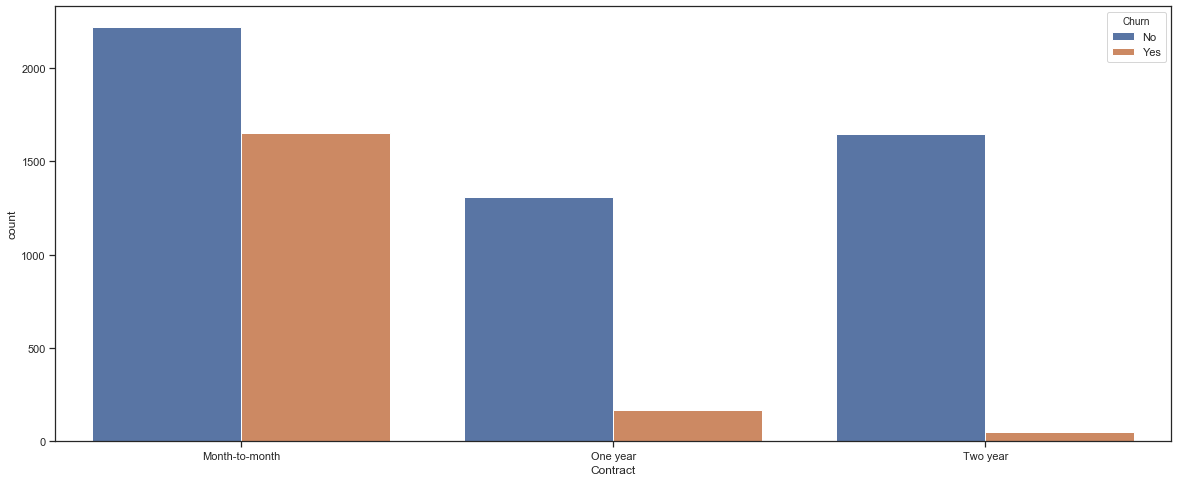

In [13]:
sns.countplot(x=data['Contract'],hue=data['Churn'])

In [14]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

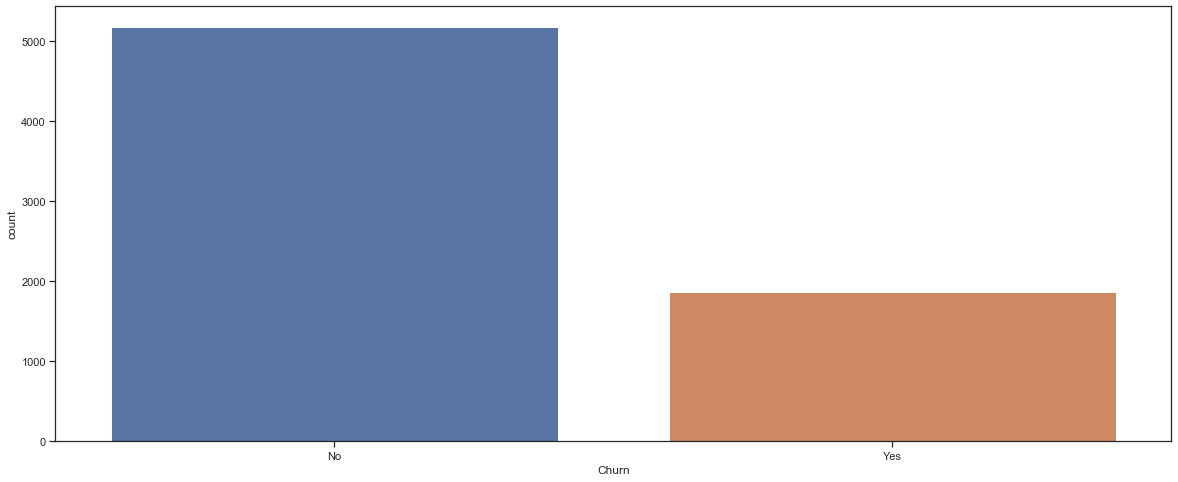

In [15]:
sns.countplot(data['Churn'])

In [16]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges']).astype(float)
data.drop("customerID", axis= 1, inplace= True) 

In [17]:
data.Region.value_counts()

Germany    6761
France      194
England      88
Name: Region, dtype: int64

In [18]:
from sklearn.preprocessing import OneHotEncoder
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})
data['Contract'] = data['Contract'].map({'Month-to-month': 0, 'One year':1,'Two year': 2})

enc = OneHotEncoder(handle_unknown='ignore')
data['Contract']=pd.DataFrame(enc.fit_transform(data[['Contract']]).toarray())
data['gender'] = pd.DataFrame(enc.fit_transform(data[['gender']]).toarray())
data['PhoneService'] = pd.DataFrame(enc.fit_transform(data[['PhoneService']]).toarray())
data['OnlineSecurity'] = pd.DataFrame(enc.fit_transform(data[['OnlineSecurity']]).toarray())
data['OnlineBackup'] = pd.DataFrame(enc.fit_transform(data[['OnlineBackup']]).toarray())
data['MultipleLines'] = pd.DataFrame(enc.fit_transform(data[['MultipleLines']]).toarray())
data['InternetService'] = pd.DataFrame(enc.fit_transform(data[['InternetService']]).toarray())
data['DeviceProtection'] = pd.DataFrame(enc.fit_transform(data[['DeviceProtection']]).toarray())
data['TechSupport'] = pd.DataFrame(enc.fit_transform(data[['TechSupport']]).toarray())
data['StreamingTV'] = pd.DataFrame(enc.fit_transform(data[['StreamingTV']]).toarray())
data['StreamingMovies'] = pd.DataFrame(enc.fit_transform(data[['StreamingMovies']]).toarray())
data['PaperlessBilling'] = pd.DataFrame(enc.fit_transform(data[['PaperlessBilling']]).toarray())
data['PaymentMethod'] = pd.DataFrame(enc.fit_transform(data[['PaymentMethod']]).toarray())
data['TechSupport'] = pd.DataFrame(enc.fit_transform(data[['TechSupport']]).toarray())
data['Region'] = pd.DataFrame(enc.fit_transform(data[['Region']]).toarray())
data['Partner'] = pd.DataFrame(enc.fit_transform(data[['Partner']]).toarray())

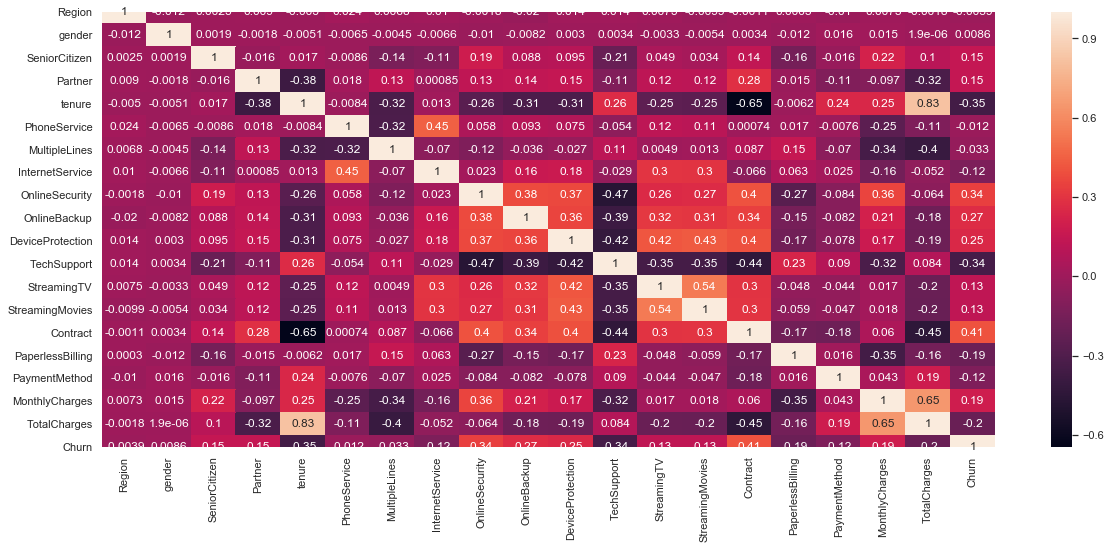

In [19]:
sns.set(rc={'figure.figsize':(20,8)});
sns.heatmap(data.corr(), annot=True)
plt.show()

In [49]:
X = data[['tenure','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','Contract','TotalCharges']]
y = data['Churn']
X.shape

(7043, 7)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [22]:
X_train,X_test, y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [23]:
y_train.head()

2142    0
1623    0
6074    1
1362    1
6754    0
Name: Churn, dtype: int64

In [24]:
X = pd.concat([X_train, y_train], axis=1)

In [25]:
X.head()

,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,TotalCharges,Churn
2142,21,0.0,1.0,0.0,0.0,0.0,1336.800,0
1623,54,1.0,0.0,1.0,0.0,0.0,5129.450,0
6074,1,1.0,1.0,1.0,0.0,1.0,23.450,1
1362,4,1.0,1.0,1.0,0.0,1.0,237.950,1
6754,0,0.0,0.0,1.0,1.0,0.0,1397.475,0


In [26]:
not_churn = X[X.Churn==0]
churn = X[X.Churn==1]

In [27]:
churn_upsampled = resample(churn,
                          replace=True, # sample with replacement
                          n_samples=len(not_churn), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_churn, churn_upsampled])

# check new class counts
upsampled.Churn.value_counts()

1    4138
0    4138
Name: Churn, dtype: int64

In [28]:
# Modeling
y_train = upsampled.Churn
X_train = upsampled[['tenure','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','Contract','TotalCharges']]

In [30]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
model = RandomForestClassifier(n_estimators=100, max_depth=20,random_state=42)
model.fit(X_train, y_train) 
score = model.score(X_train, y_train)
score2 = model.score(X_test, y_test)
print("Training dataset accuracy: ", '%.3f'%(score))
print("Test dataset accuracy: ", '%.3f'%(score2))

Training dataset accuracy:  0.990
Test dataset accuracy:  0.759


In [32]:
modelpredictions = model.predict(X_test)
modelprobability = model.predict_proba(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[862 174]
 [166 207]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1036
           1       0.54      0.55      0.55       373

    accuracy                           0.76      1409
   macro avg       0.69      0.69      0.69      1409
weighted avg       0.76      0.76      0.76      1409

0.758694109297374


In [35]:
f1score = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
f1score.head()

,feature,importance
6,TotalCharges,0.460602
0,tenure,0.252261
5,Contract,0.120846
1,OnlineSecurity,0.065206
4,TechSupport,0.060212
